In [1]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
def warp(img, M):
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

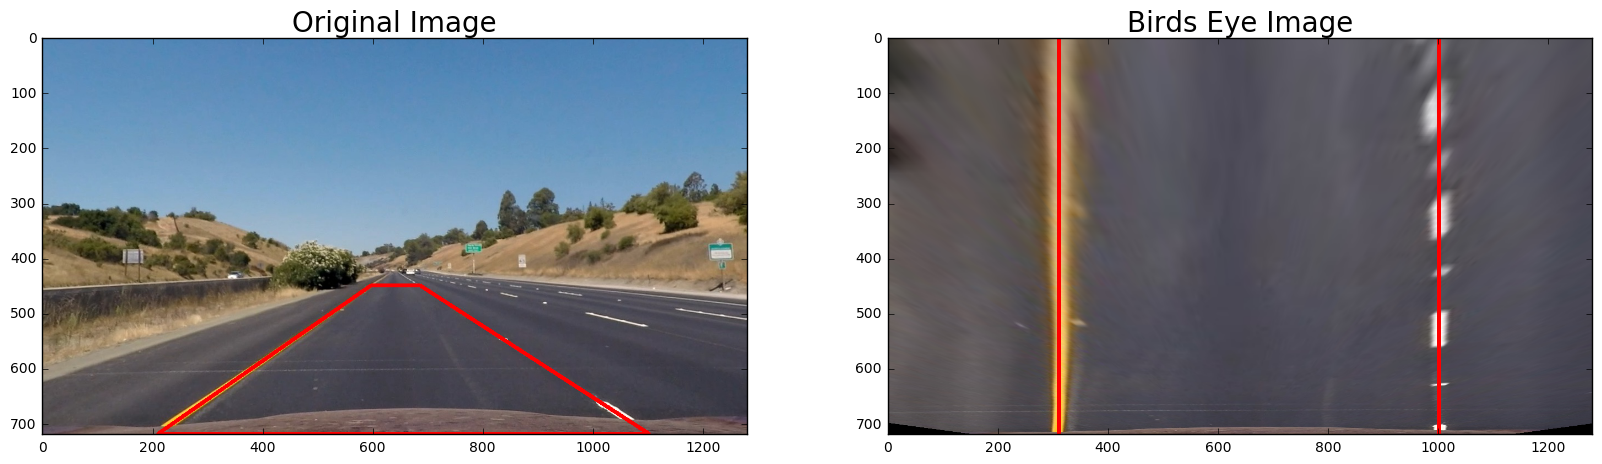

In [3]:
# Read a straight lines image
img = cv2.imread('output_images/undistorted_straight_lines1.jpg')

# Define source and destination points for the perspective transform 
src = np.float32([[596, 450], [210, 719], [1100, 719], [685, 450]])
dst = np.float32([[310, 120], [310, 719], [1000, 719], [1000, 120]])

# Create matrices for the transforma nd inverse transform
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

# Save M and Minv in a pickle file
Mat_pickle = {}
Mat_pickle["M"] = M
Mat_pickle["Minv"] = Minv
pickle.dump(Mat_pickle, open( "M_and_Minv.p", "wb" ) )

# Create warped image
warped = warp(img, M)

# Draw red lines on the original and warped images
cv2.polylines(img, [np.int32(src)], True,(0,0,255),5)
cv2.line(warped, (310,0), (310,719), (0,0,255),5)
cv2.line(warped, (1000,0), (1000,719), (0,0,255),5)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(warped)
ax2.set_title('Birds Eye Image', fontsize=20)



In [4]:
mpimg.imsave('readme_images/BirdsEye.jpg', warped)